trying the models on the synthetic database
 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report



In [3]:
data = pd.read_csv('../data/synthetic_financial_data.csv')
data.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [6]:
data['is_fraudulent'].value_counts()
data.columns


Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_time', 'is_fraudulent', 'card_type', 'location',
       'purchase_category', 'customer_age', 'transaction_description'],
      dtype='object')

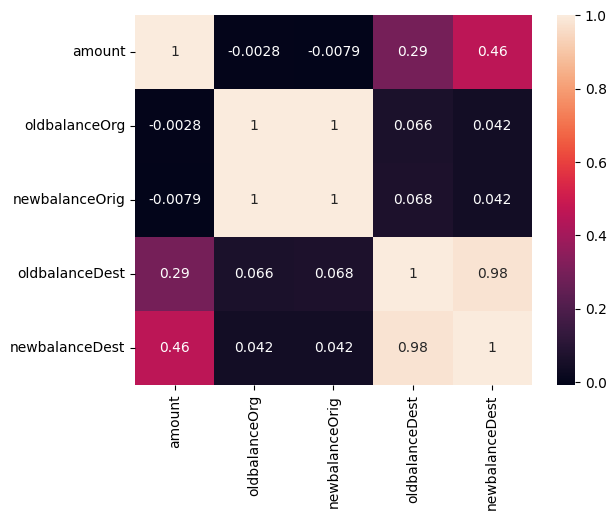

C:\Users\vishn\AppData\Local\Temp\ipykernel_69844\3225041648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,inputcols]=sc.transform(x[inputcols])


In [33]:
inputcols = ['amount', 'card_type', 'location',
       'purchase_category', 'customer_age', 'transaction_description']
x = data[inputcols]
y = data['isFraud']


# max_amount = x['amount'].max()
# x['amount'] = x['amount']/max_amount
# print(x['amount'].describe())

correlation = x.corr()
sns.heatmap(correlation, annot=True)
plt.show()

sc=StandardScaler().fit(x[inputcols])
x.loc[:,inputcols]=sc.transform(x[inputcols])


count    6.362620e+06
mean    -4.946736e-17
std      1.000000e+00
min     -2.978545e-01
25%     -2.756812e-01
50%     -1.738653e-01
75%      4.779197e-02
max      1.527936e+02
Name: amount, dtype: float64


(0.0, 100000.0)

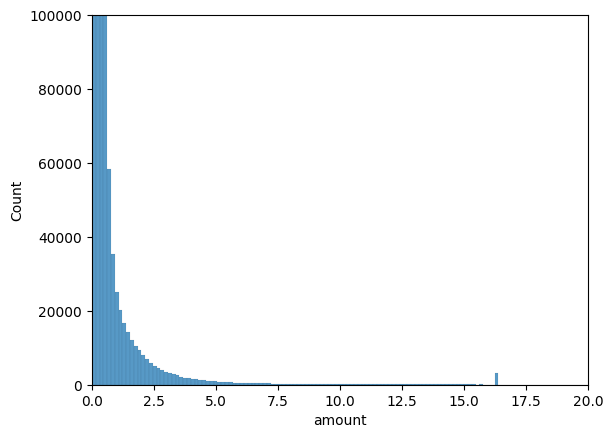

In [45]:
print(x['amount'].describe())

fig, ax = plt.subplots()
sns.histplot(x['amount'], bins=1000, ax=ax) 
ax.set_xlim(0, 20)
ax.set_ylim(0,100000)
# plt.show()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
def fit_model_to_data(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Model:', model)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [37]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersample.fit_resample(x_train, y_train)
x_test_resampled,y_test_resampled=undersample.fit_resample(x_test,y_test)

x_train=x_resampled
y_train=y_resampled
x_test=x_test_resampled
y_test=y_test_resampled

In [38]:
fit_model_to_data(LogisticRegression())

Model: LogisticRegression()
Accuracy: 0.867481662591687
Confusion Matrix:
 [[2011   34]
 [ 508 1537]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      2045
           1       0.98      0.75      0.85      2045

    accuracy                           0.87      4090
   macro avg       0.89      0.87      0.87      4090
weighted avg       0.89      0.87      0.87      4090



In [39]:
fit_model_to_data(GaussianNB())

Model: GaussianNB()
Accuracy: 0.6591687041564792
Confusion Matrix:
 [[2004   41]
 [1353  692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.74      2045
           1       0.94      0.34      0.50      2045

    accuracy                           0.66      4090
   macro avg       0.77      0.66      0.62      4090
weighted avg       0.77      0.66      0.62      4090



In [40]:
fit_model_to_data(DecisionTreeClassifier(max_depth=20))

Model: DecisionTreeClassifier(max_depth=20)
Accuracy: 0.9924205378973106
Confusion Matrix:
 [[2027   18]
 [  13 2032]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2045
           1       0.99      0.99      0.99      2045

    accuracy                           0.99      4090
   macro avg       0.99      0.99      0.99      4090
weighted avg       0.99      0.99      0.99      4090



In [41]:
fit_model_to_data(RandomForestClassifier(n_estimators=50))


Model: RandomForestClassifier(n_estimators=50)
Accuracy: 0.99119804400978
Confusion Matrix:
 [[2019   26]
 [  10 2035]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2045
           1       0.99      1.00      0.99      2045

    accuracy                           0.99      4090
   macro avg       0.99      0.99      0.99      4090
weighted avg       0.99      0.99      0.99      4090



In [42]:
fit_model_to_data(GradientBoostingClassifier(n_estimators=50))

Model: GradientBoostingClassifier(n_estimators=50)
Accuracy: 0.9748166259168705
Confusion Matrix:
 [[1967   78]
 [  25 2020]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2045
           1       0.96      0.99      0.98      2045

    accuracy                           0.97      4090
   macro avg       0.98      0.97      0.97      4090
weighted avg       0.98      0.97      0.97      4090



In [43]:
fit_model_to_data(XGBClassifier(n_estimators=50))

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.9867970660146699
Confusion Matrix:
 [[2006   39]
 [  15 2030]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2045
           1       0.98      